In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os
import statistics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

## Analysis on Problem 1:

# Q1 Read the data as an appropriate Time Series data and plot the data.

In [156]:
df1 = pd.read_csv('Downloads/Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [157]:
# Top 5 rows of the data.
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [158]:
# last 5 rows of the data.
df1.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


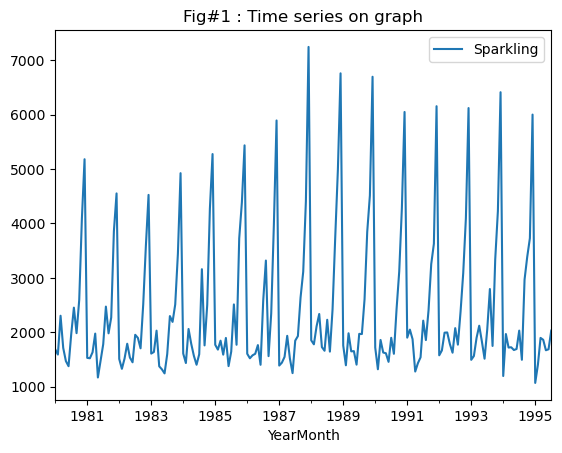

In [160]:
#Plot the time series
df1.plot()
plt.title('Fig#1 : Time series on graph');
plt.show()


As per the graph Sparkling wine sales hit maximum numbers in year 1988.

# Q2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [161]:
df1.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

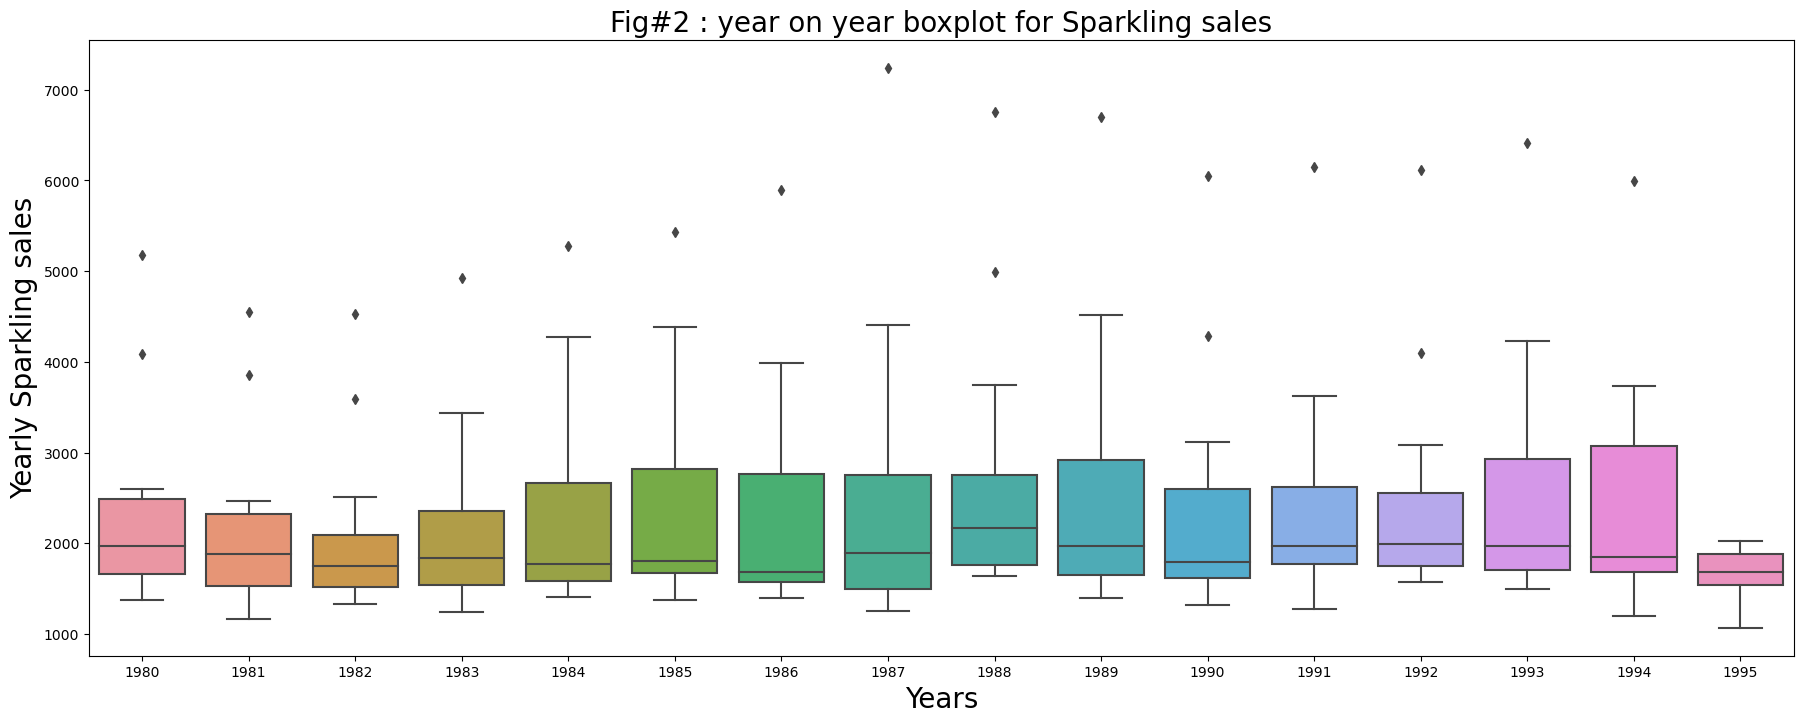

In [162]:
plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, y= 'Sparkling', data=df1)
plt.xlabel('Years',fontsize=20);
plt.ylabel('Yearly Sparkling sales',fontsize=20);
plt.title('Fig#2 : year on year boxplot for Sparkling sales',fontsize=20);

We can see that we have data from past 16 years .

As we got to know from the Time Series plot, the boxplots over here indicates no such trend present. Also, we see that the sales of wine has some outliers for most of years.

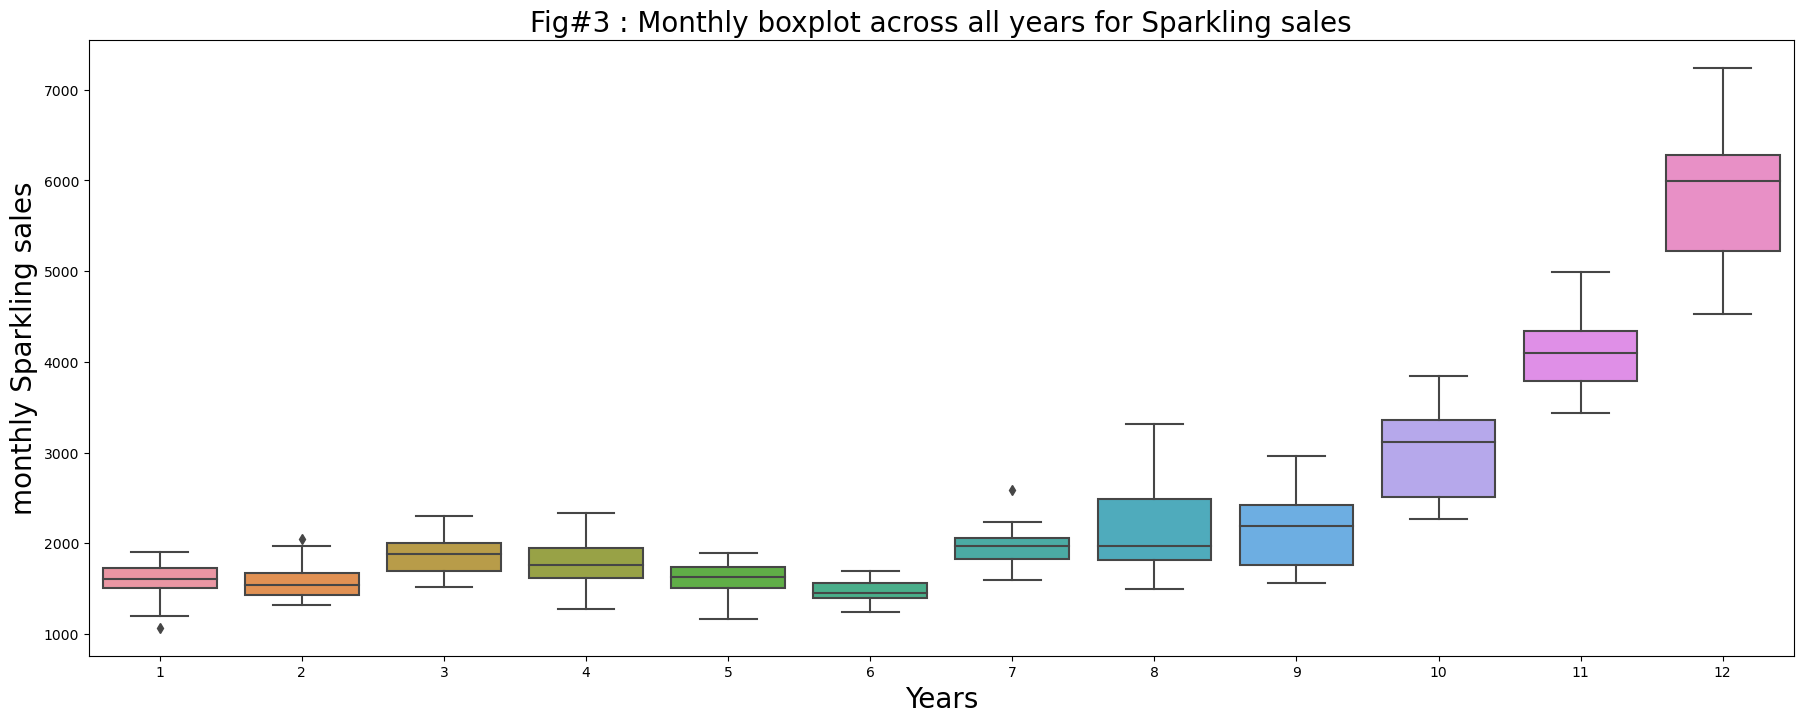

In [163]:
plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.month, y= 'Sparkling', data=df1)
plt.xlabel('Years',fontsize=20);
plt.ylabel('monthly Sparkling sales',fontsize=20);
plt.title('Fig#3 : Monthly boxplot across all years for Sparkling sales',fontsize=20);

The boxplots for the monthly production for different years have outliers.

We can see that sales of Sparkling wine increses at the end of the year.

## Plot a monthplot of the given Time Series.

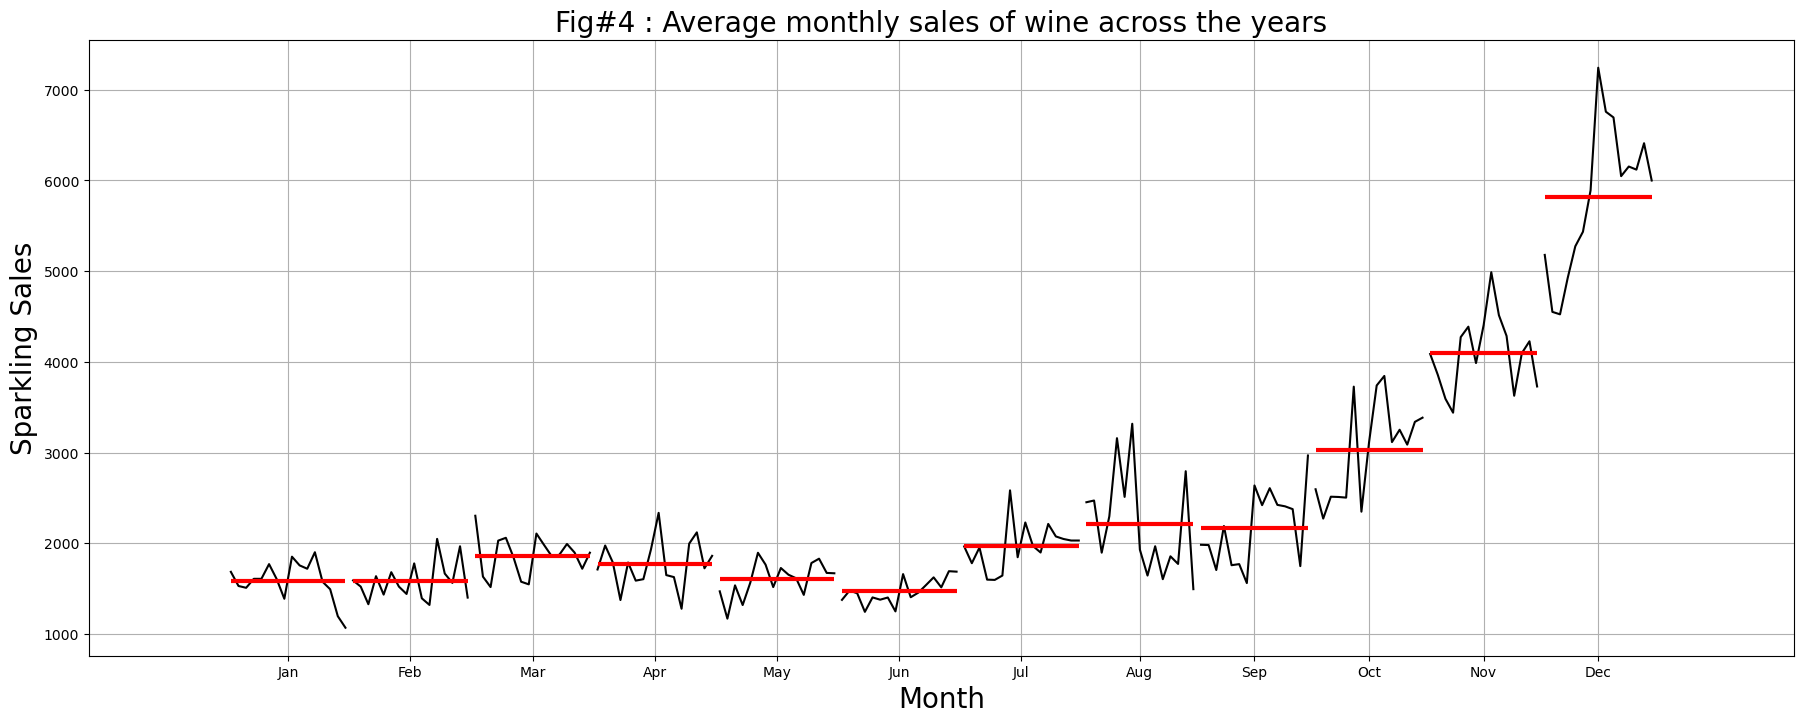

In [164]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1,ylabel='Sparkling Sales',ax=ax)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Sparkling Sales',fontsize=20)
plt.title('Fig#4 : Average monthly sales of wine across the years',fontsize=20);
plt.grid();

Here the red line shows the average wine sales for all the years in a particular month.

### Plot a graph of monthly sales across years.

In [165]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


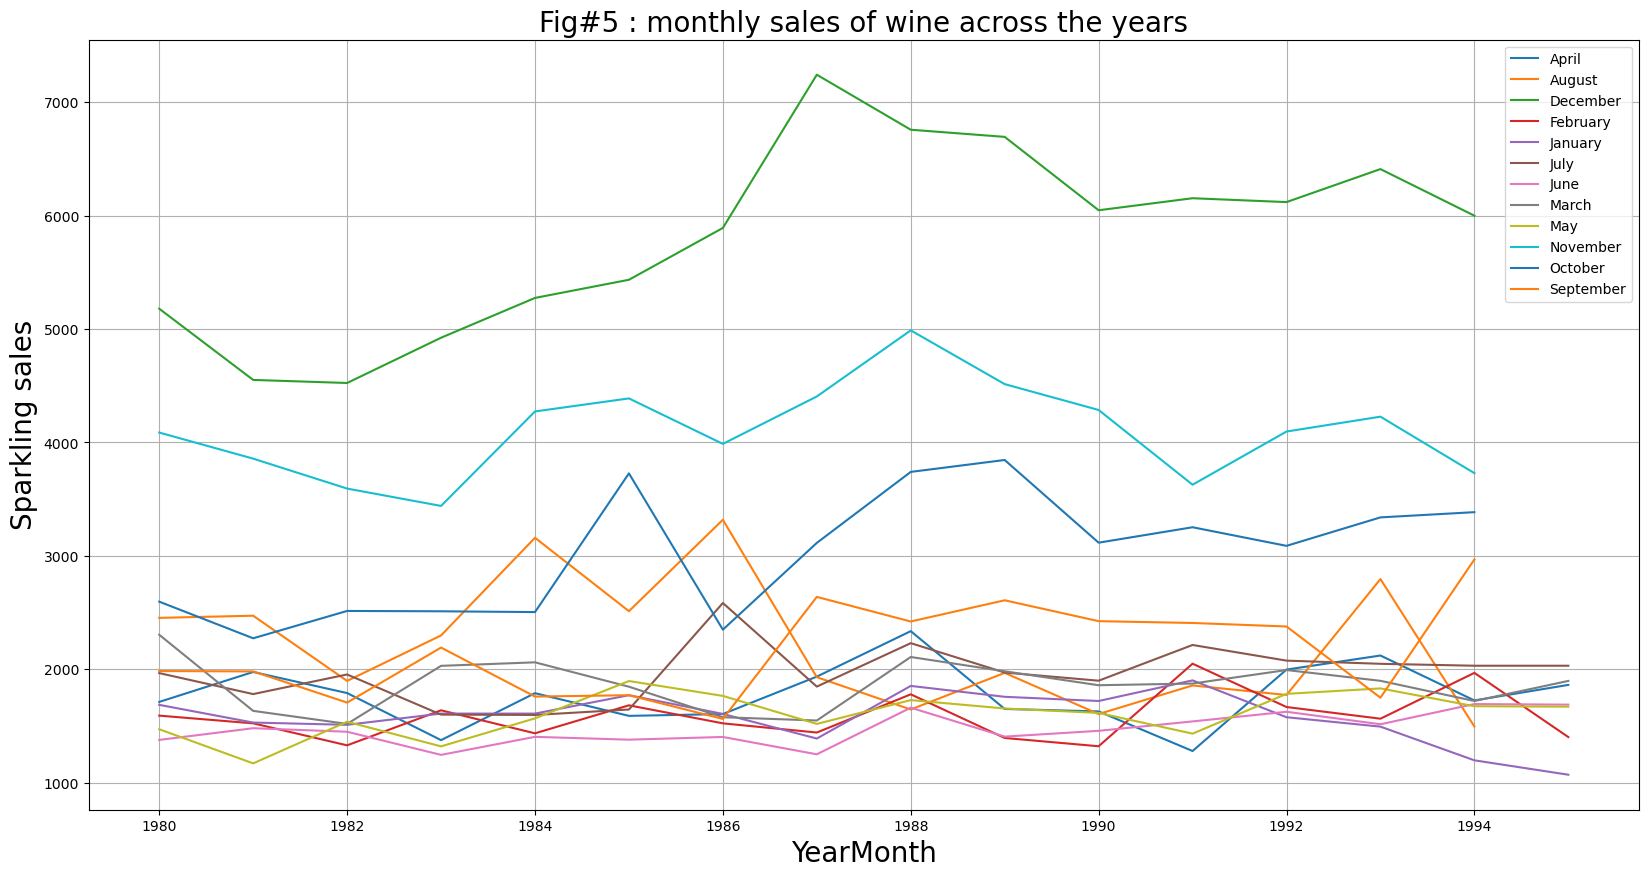

In [166]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.ylabel('Sparkling sales',fontsize=20);
plt.xlabel('YearMonth',fontsize=20);
plt.title('Fig#5 : monthly sales of wine across the years',fontsize=20);

We can see that sales are maximum for december month.

## Read this monthly data into a quarterly and yearly format

### Yearly plot

In [167]:
df1_yearly_sum = df1.resample('A').sum()
df1_yearly_sum.head()

,Sparkling
YearMonth,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


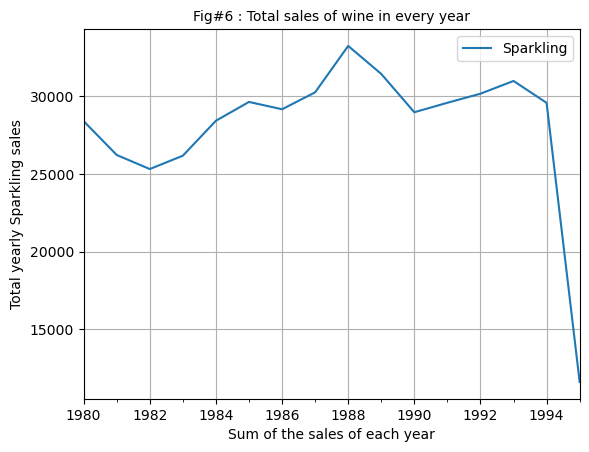

In [168]:
df1_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the sales of each year');
plt.ylabel('Total yearly Sparkling sales',fontsize=10);
plt.title('Fig#6 : Total sales of wine in every year',fontsize=10);

In [169]:
df1_yearly_mean = df1.resample('A').mean()
df1_yearly_mean.head()

,Sparkling
YearMonth,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


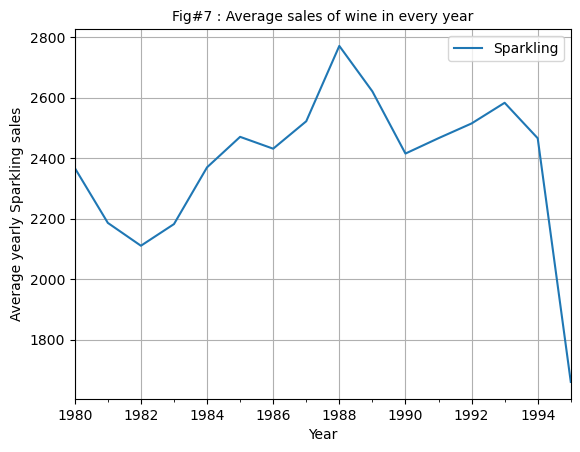

In [170]:
df1_yearly_mean.plot();
plt.grid()
plt.xlabel('Year');
plt.ylabel('Average yearly Sparkling sales',fontsize=10);
plt.title('Fig#7 : Average sales of wine in every year',fontsize=10);

### Quarterly  plot

In [171]:
df1_quarterly_sum = df1.resample('Q').sum()
df1_quarterly_sum.head()

,Sparkling
YearMonth,
1980-03-31,5581
1980-06-30,4560
1980-09-30,6403
1980-12-31,11862
1981-03-31,4686


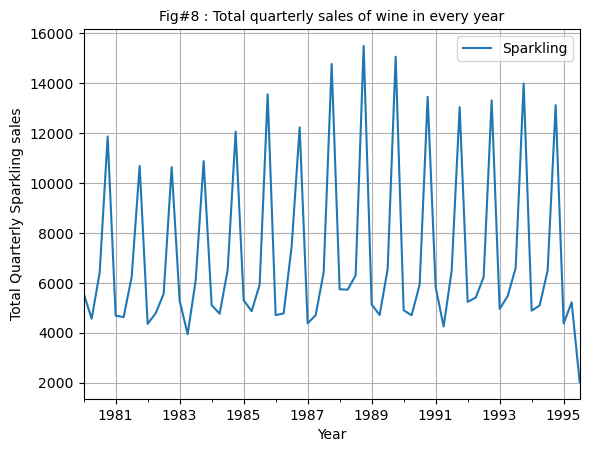

In [172]:
df1_quarterly_sum.plot();
plt.grid()
plt.xlabel('Year')
plt.ylabel('Total Quarterly Sparkling sales',fontsize=10);
plt.title('Fig#8 : Total quarterly sales of wine in every year',fontsize=10);

In [173]:
df1_quarterly_mean = df1.resample('Q').mean()
df1_quarterly_mean.head()

,Sparkling
YearMonth,
1980-03-31,1860.333333
1980-06-30,1520.000000
1980-09-30,2134.333333
1980-12-31,3954.000000
1981-03-31,1562.000000


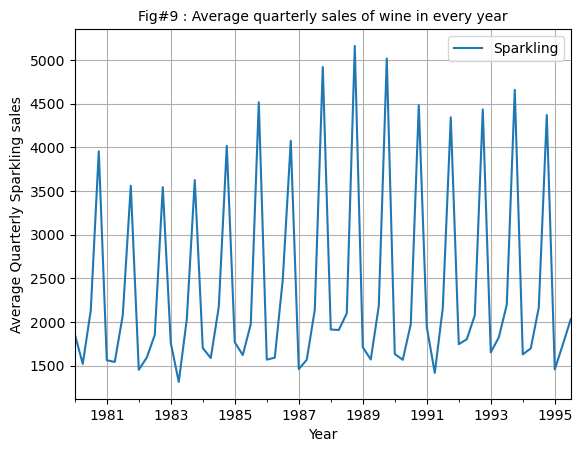

In [174]:
df1_quarterly_mean.plot();
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Quarterly Sparkling sales',fontsize=10);
plt.title('Fig#9 : Average quarterly sales of wine in every year',fontsize=10);

## Decompose the Time Series

### Additive Model

In [175]:
from statsmodels.tsa.seasonal import seasonal_decompose

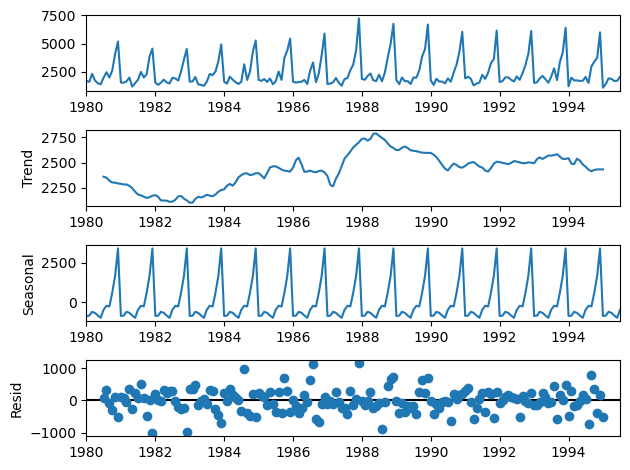

In [176]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

We can see that seasonality present in the time series data.

We can see that residuals are random as there is no trend present in the residuals.

In [177]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [178]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


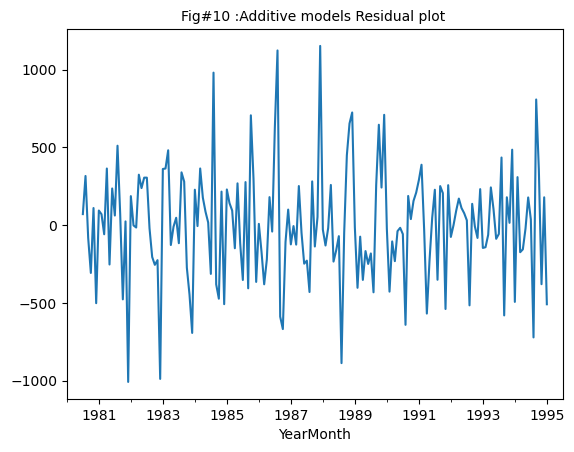

In [179]:
residual.plot()
plt.title('Fig#10 :Additive models Residual plot ',fontsize=10);
plt.show()

### multiplicative Model

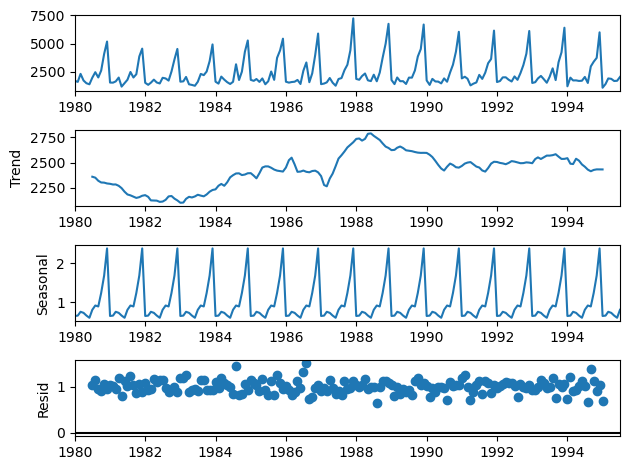

In [180]:
decomposition_mul = seasonal_decompose(df1,model='multiplicative')
decomposition_mul.plot();

as per multiplicative model We can see that seasonality present in the time series data

In [181]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

In [182]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

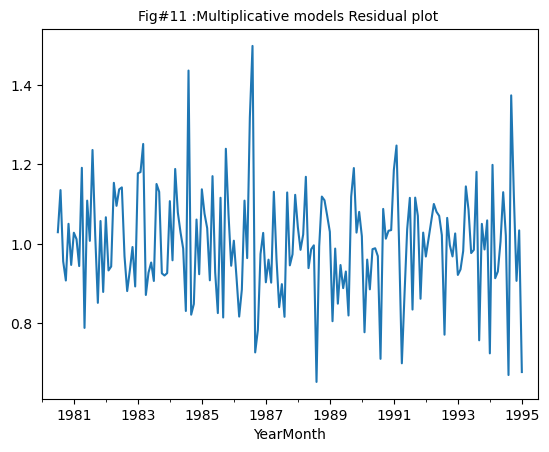

In [183]:
residual.plot()
plt.title('Fig#11 :Multiplicative models Residual plot ',fontsize=10);
plt.show()

We can see that in both residual's plot residuals are random as it does not follow any pattern and so there is no clear merit to specifially choose multiplocate decomsitation as additive is good enough.

We can say that there is no clear trend present.

# Q3 Split the data into training and test. The test data should start in 1991. 

### Split the data into train and test and plot the training and test data

In [184]:
train = df1[df1.index<'1991'] 
test = df1[df1.index>='1991']

In [185]:
train.shape

(132, 1)

In [186]:
test.shape

(55, 1)

In [187]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


# Q4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [188]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## Model 1: Simple Exponential Smoothing

In [189]:
SES_train = train.copy()
SES_test = test.copy()

In [190]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [191]:
model_SES_autofit = model_SES.fit(optimized=True)

In [192]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [193]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2724.932624
1991-02-01,2049,2724.932624
1991-03-01,1874,2724.932624
1991-04-01,1279,2724.932624
1991-05-01,1432,2724.932624


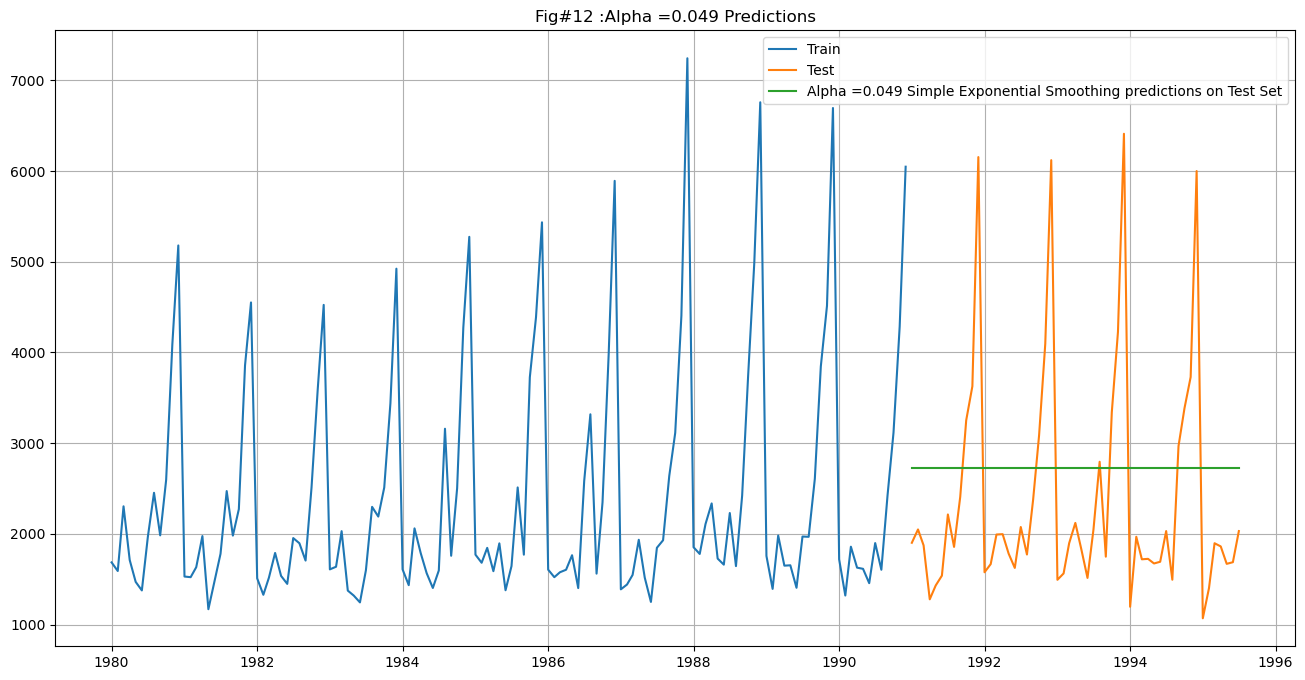

In [194]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Fig#12 :Alpha =0.049 Predictions');

### Model Evaluation for α = 0.049 : Simple Exponential Smoothing

In [195]:
from sklearn import metrics

In [196]:
rmse_model1_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model1_test_1))

For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [197]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_1]},index=['Alpha =0.049, Simple Exponential Smoothing'])
resultsDf

,Test RMSE
"Alpha =0.049, Simple Exponential Smoothing",1316.035487


#### checking different alpha values

In [198]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_1 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_1

,Alpha Values,Train RMSE,Test RMSE


In [199]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model1_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model1_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_1 = resultsDf_1.append({'Alpha Values':i,'Train RMSE':rmse_model1_train_i 
                                      ,'Test RMSE':rmse_model1_test_i}, ignore_index=True)

### Model Evaluation

In [200]:
resultsDf_1.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,1359.511747,1935.507132
1,0.4,1352.588879,2311.919615
2,0.5,1344.004369,2666.351413
3,0.6,1338.805381,2979.204388
4,0.7,1338.844308,3249.944092
5,0.8,1344.462091,3483.801006
6,0.9,1355.723518,3686.794285


After checking different value of alpha we are unable to get RMSE less than 1316.035 which we obtained when Alpha = 0.049

With Alpha =0.049 we can say that past observations have a large influence on forecasts.

In [201]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_1]},index=['Alpha=0.049,SimpleExponentialSmoothing'])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487


## Model 2: Double Exponential Smoothing (Holt's Model)

In [202]:
DES_train = train.copy()
DES_test = test.copy()

In [203]:
model_DES = Holt(DES_train['Sparkling'])

In [204]:
model_DES_autofit= model_DES.fit(optimized=True)

In [205]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [206]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,5221.278699
1991-02-01,2049,5127.886554
1991-03-01,1874,5034.494409
1991-04-01,1279,4941.102264
1991-05-01,1432,4847.710119


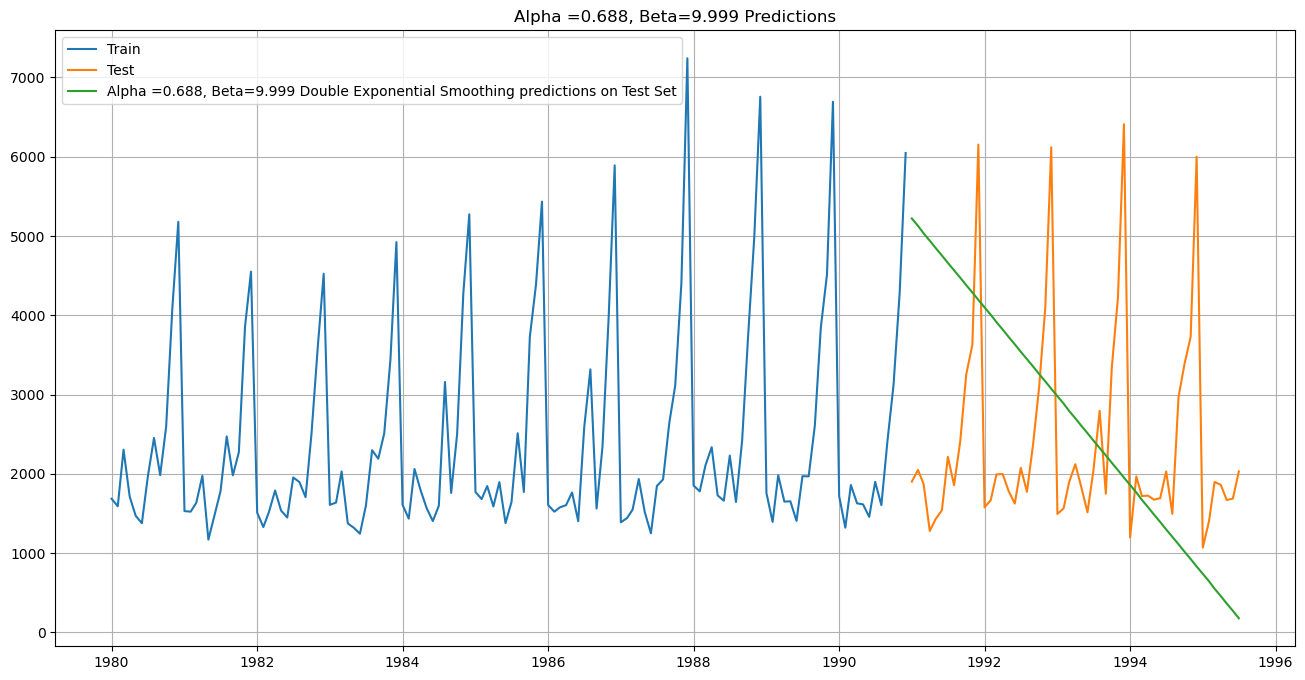

In [207]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.688, Beta=9.999 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.688, Beta=9.999 Predictions');

In [208]:
rmse_model2_test_2 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.688, Beta=9.999 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test_2))

For Alpha =0.688, Beta=9.999 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [209]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_2]},index=['Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526


In [210]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [211]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

In [212]:
resultsDf_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,18259.110704
8,0.4,0.3,1569.338606,23878.496940
1,0.3,0.4,1682.573828,26069.841401
16,0.5,0.3,1530.575845,27095.532414
24,0.6,0.3,1506.449870,29070.722592


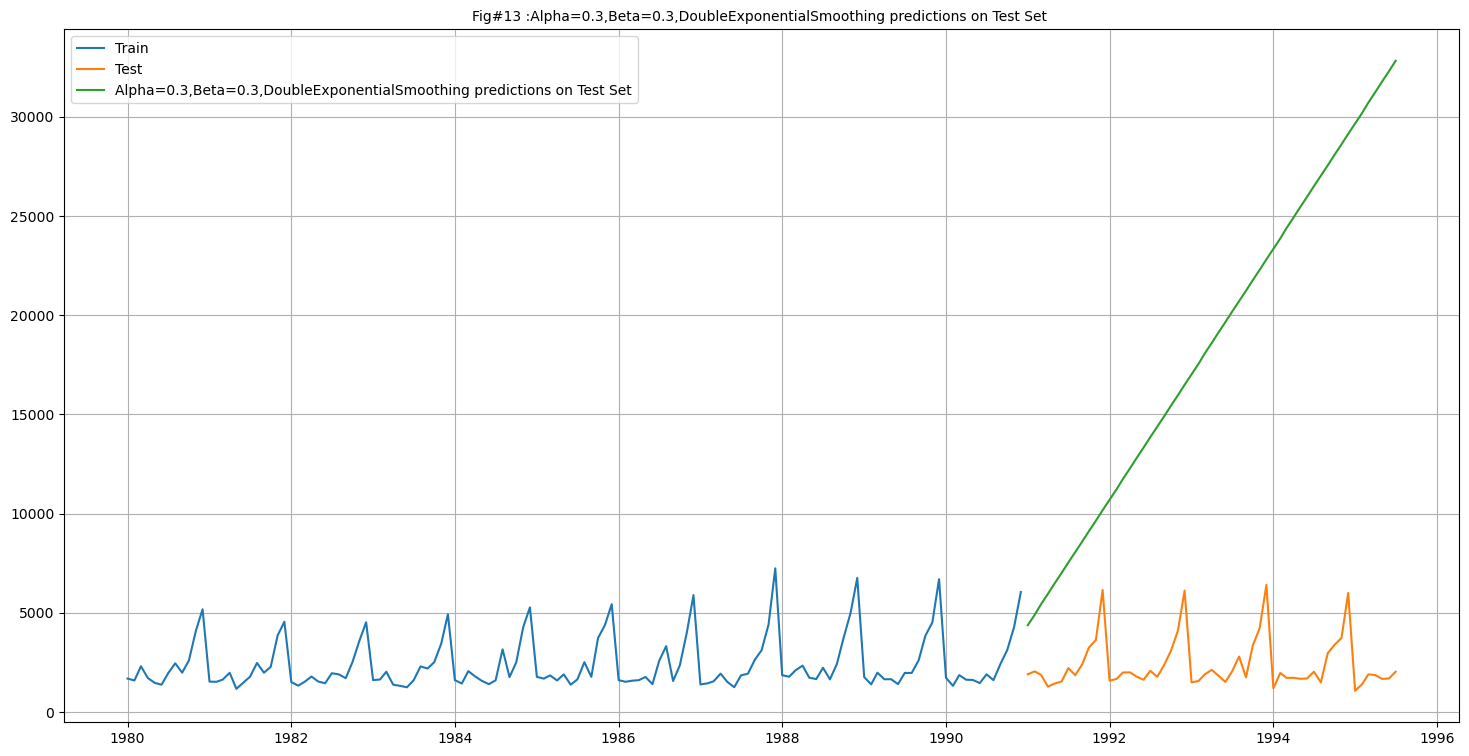

In [213]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.title('Fig#13 :Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set ',fontsize=10);
plt.legend(loc='best')
plt.grid();

In [214]:
resultsDf_2_1 = pd.DataFrame({'Test RMSE': [resultsDf_2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_2_1])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


## Model 3: Triple Exponential Smoothing (Holt - Winter's Model)

In [215]:
TES_train = train.copy()
TES_test = test.copy()

In [216]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive')

In [217]:
model_TES_autofit = model_TES.fit()

In [218]:
model_TES_autofit.params

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [219]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
YearMonth,,
1991-01-01,1902,1490.402890
1991-02-01,2049,1204.525152
1991-03-01,1874,1688.734182
1991-04-01,1279,1551.226125
1991-05-01,1432,1461.197883


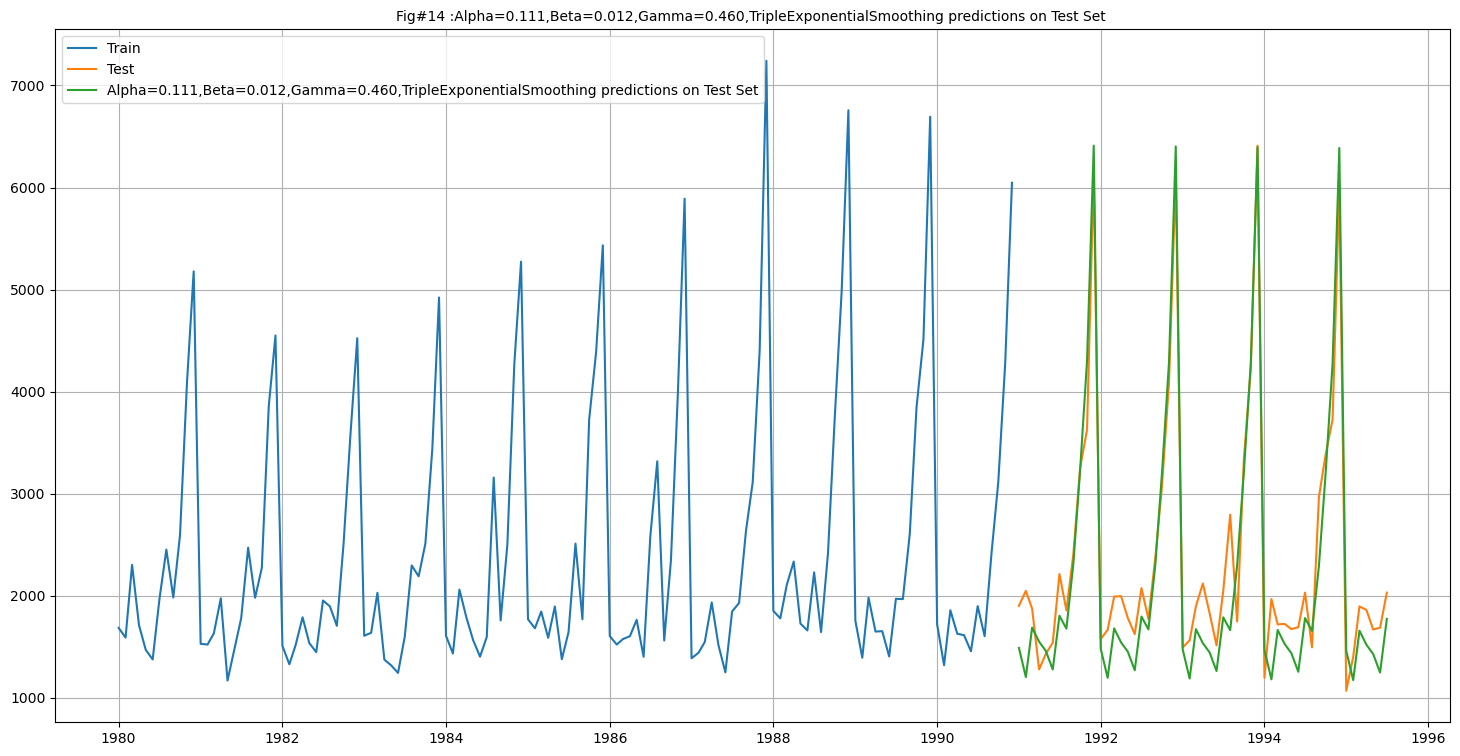

In [220]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing predictions on Test Set')
plt.title('Fig#14 :Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing predictions on Test Set ',fontsize=10);
plt.legend(loc='best')
plt.grid();

In [221]:
rmse_model3_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.012,Gamma=0.460, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_1))

For Alpha=0.111,Beta=0.012,Gamma=0.460, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 378.951


In [222]:
resultsDf_3_1 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1]}
                           ,index=['Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3_1])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023


In [223]:
resultsDf_3_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_3_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [224]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model3_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model3_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_3_2 = resultsDf_3_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model3_train,'Test RMSE':rmse_model3_test}
                                                 , ignore_index=True)

In [225]:
resultsDf_3_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
129,0.5,0.3,0.4,477.403185,649.197748
7,0.3,0.3,1.0,538.858393,687.206158
64,0.4,0.3,0.3,464.061379,734.718132
464,1.0,0.5,0.3,660.104855,769.360784
196,0.6,0.3,0.7,569.835997,926.412440


After checking different values of alpha, Beta & Gamma we are unable to get RMSE less than 378.95 which we obtained when Alpha=0.111,Beta=0.012,Gamma=0.460

## Model 4: Naive forecast

In [226]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [227]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

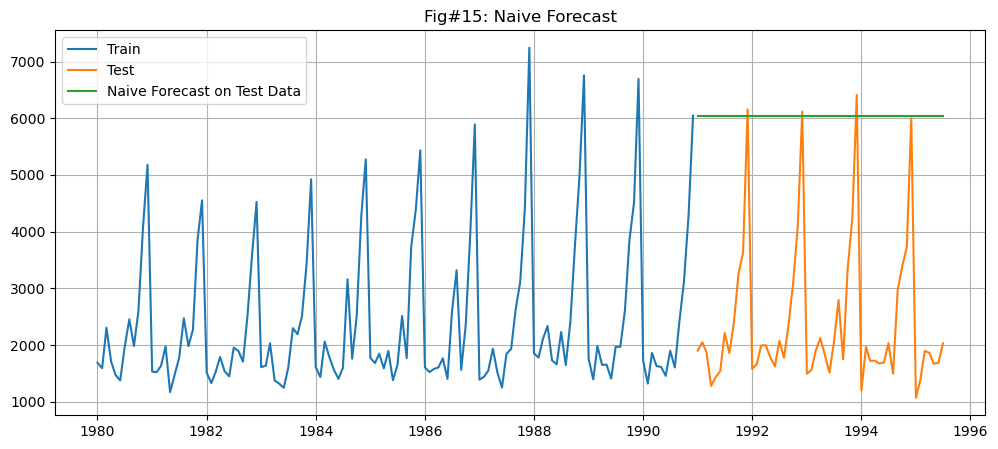

In [228]:
plt.figure(figsize=(12,5))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Fig#15: Naive Forecast")
plt.grid();

In [229]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For naive forecast on the Test Data,  RMSE is 3864.279


In [230]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352


## Model 5: Linear Regression

### Generating the numerical time instance order

In [231]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Train Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Train Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [232]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [233]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
lr = LinearRegression()

In [236]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

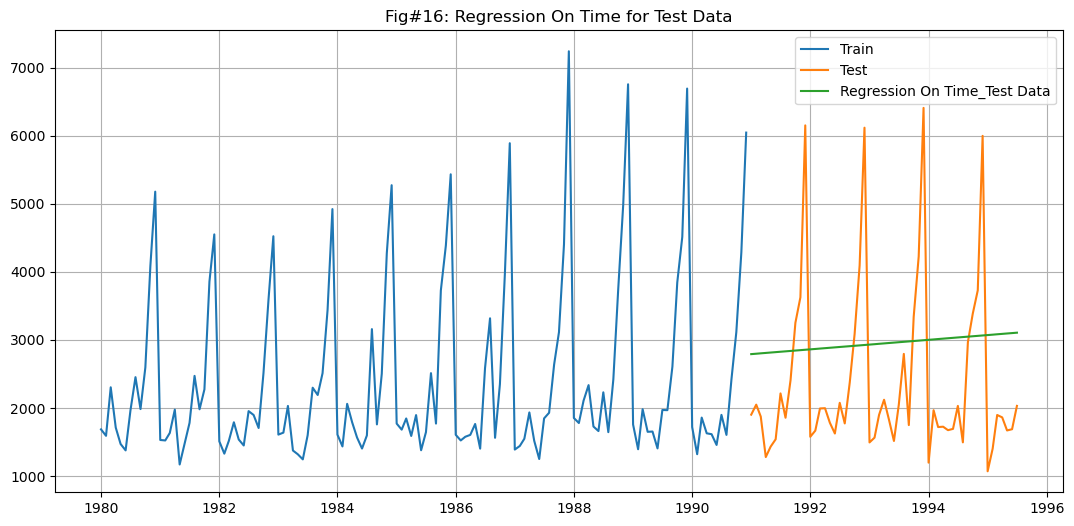

In [237]:
test_predictions_model5 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model5

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Fig#16: Regression On Time for Test Data' )
plt.grid();

In [238]:
rmse_model5_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model5,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model5_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [239]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175


## Model 6 : Simple Average

In [240]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [241]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


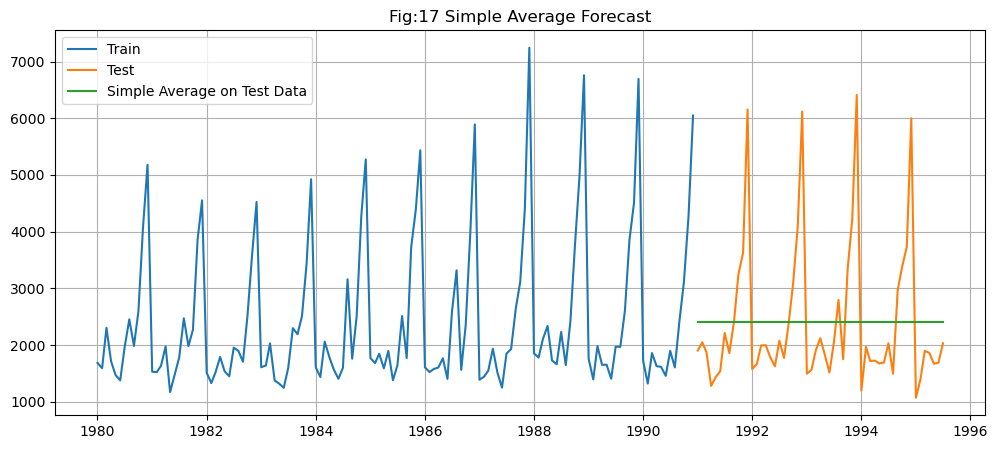

In [242]:
plt.figure(figsize=(12,5))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Fig:17 Simple Average Forecast")
plt.grid();

In [243]:
rmse_model6_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [244]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804


## Model 11 : Moving Average(MA)

In [245]:
MovingAverage = df1.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [246]:
# Trailing moving averages
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


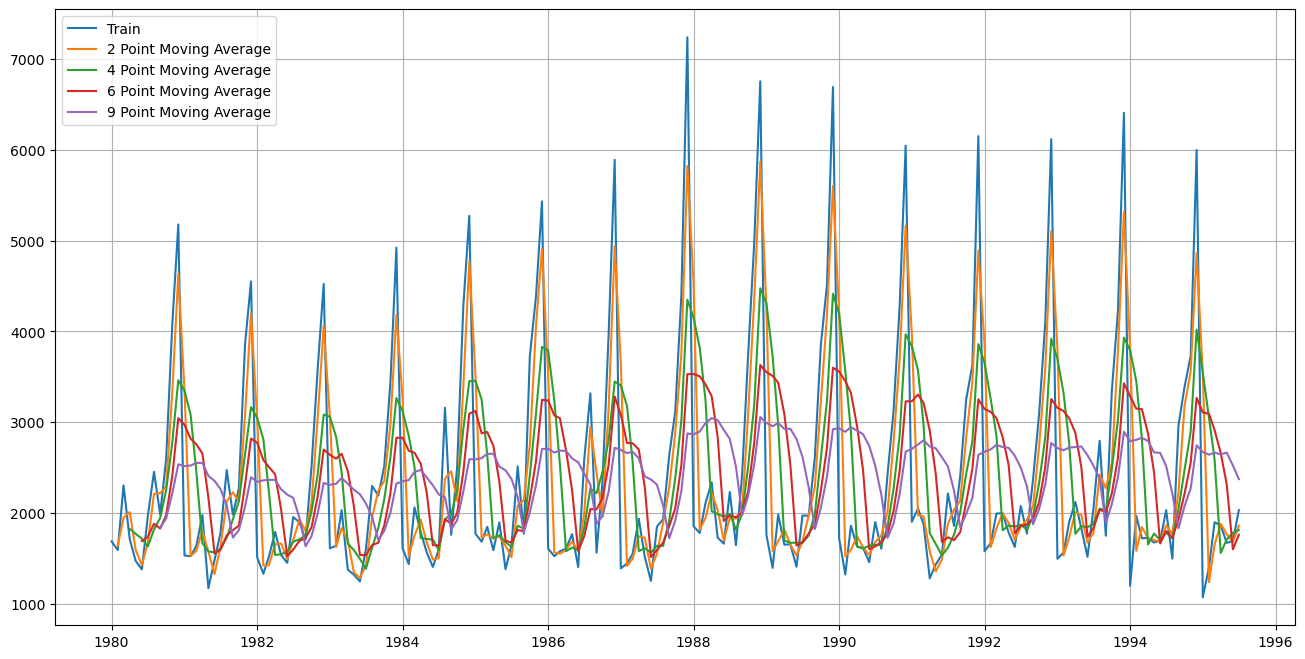

In [247]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [248]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


trailing_MovingAverage_train.tail()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1990-08-01,1605,1752.0,1644.00,1677.166667,2199.777778
1990-09-01,2424,2014.5,1846.25,1771.333333,1725.333333
1990-10-01,3116,2770.0,2261.00,2019.333333,1880.444444
1990-11-01,4286,3701.0,2857.75,2464.500000,2209.888889
1990-12-01,6047,5166.5,3968.25,3229.500000,2675.222222


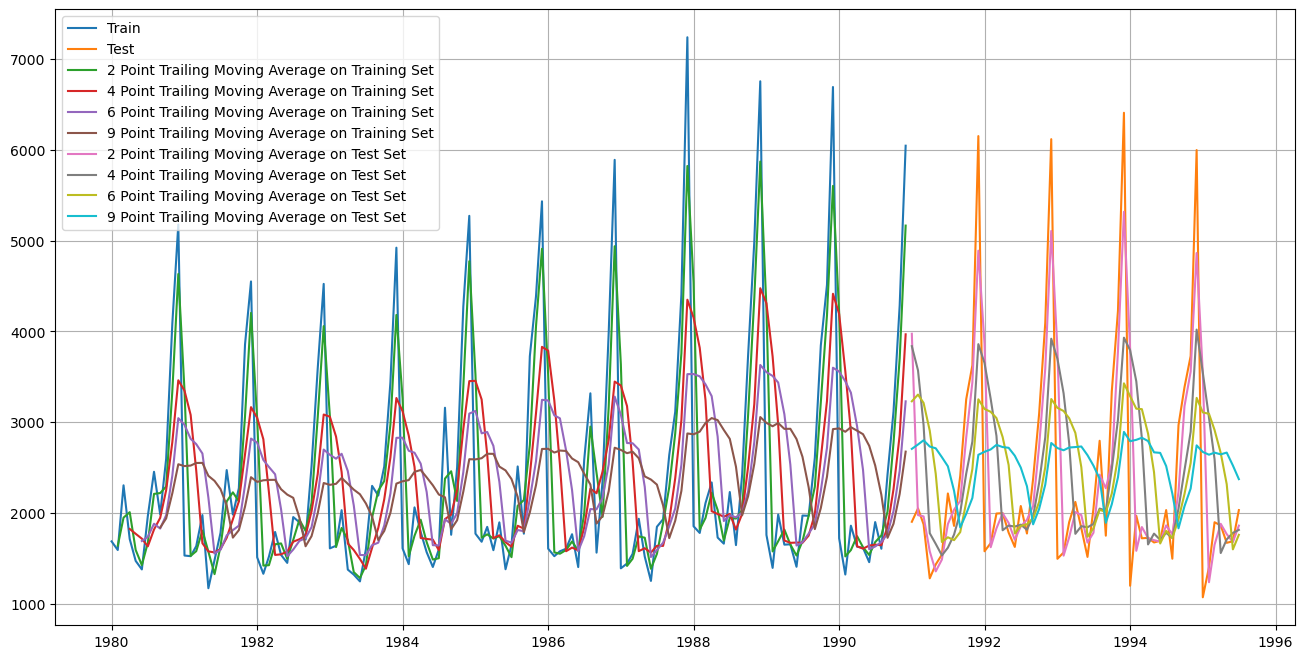

In [249]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [250]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [251]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


So Far we have tried 7 different models and TripleExponentialSmoothing suits very well on our data because seasonality present in the data which considered in the TripleExponentialSmoothing.

# Q5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

To check the stationarity of the data ADF test can be used which is a hypothesis test and following is the null & alternate hypothesis for this test.

H0  : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary.

### Check for stationarity of the whole Time Series data.

In [252]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

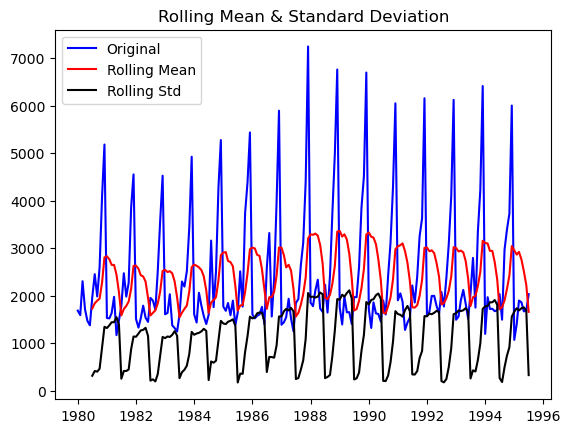

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [253]:
test_stationarity(df1['Sparkling'])


We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

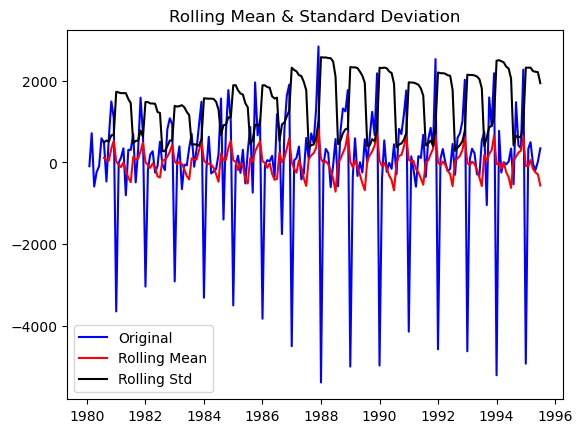

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [254]:
test_stationarity(df1['Sparkling'].diff().dropna())

We see that at α = 0.05 the Time Series become stationary.

### Check for stationarity of the Training Data Time Series.

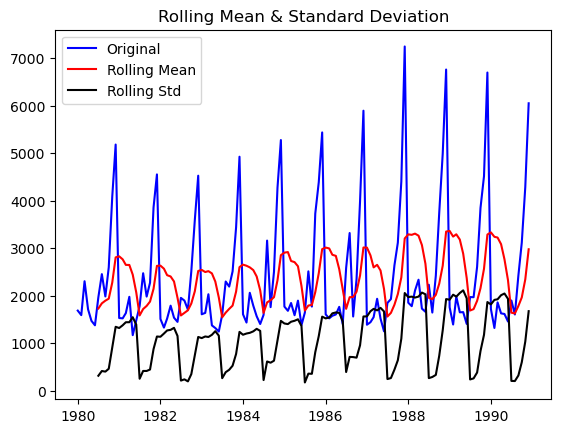

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [255]:
test_stationarity(train['Sparkling'])

We see that the train data is not stationary at α = 0.05.

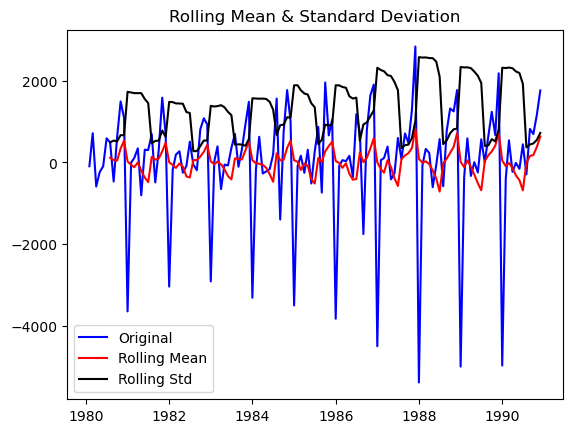

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [256]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at α = 0.05.

# Q6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Model 7 : Automated ARIMA Model

In [257]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [258]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [259]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673378
ARIMA(1, 1, 2) - AIC:2234.527200452102
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.5092123568647


In [260]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [261]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2, 1, 2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 28 Dec 2022   AIC                           2213.509
Time:                        19:08:16   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

### Predict on the Test Set using this model and evaluate the model.

In [262]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [263]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9800412702375


In [264]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_7

,Test RMSE
"ARIMA(2,1,2)",1299.980041


In [265]:
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


## Model 8 : Automated SARIMA Model

Let us look at the ACF plot to understand the seasonal parameter for the SARIMA model.

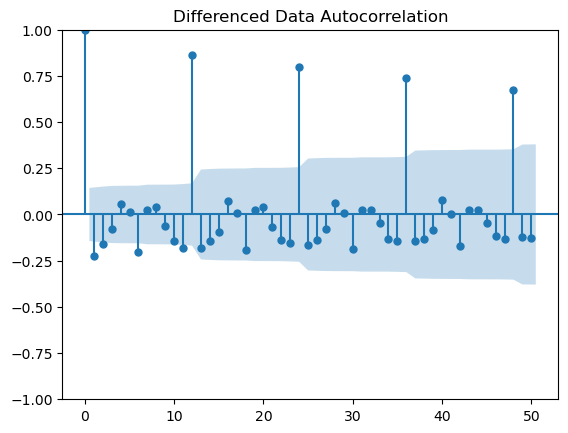

In [266]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We can see that there is a seasonality.

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [267]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [268]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [269]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536885285
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443046
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123815902
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510798
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657173
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082825
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339546054
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298141048
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274453614
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103819103
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933227066
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036716065545
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [270]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.666982
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888803
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703672
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379778
71,"(2, 1, 1)","(2, 0, 2, 6)",1744.040750


In [271]:
import statsmodels.api as sm

auto_SARIMA8 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_8 = auto_SARIMA8.fit(maxiter=1000)
print(results_auto_SARIMA_8.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.833
Date:                           Wed, 28 Dec 2022   AIC                           1727.667
Time:                                   19:09:28   BIC                           1749.696
Sample:                                        0   HQIC                          1736.609
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6444      0.286     -2.256      0.024      -1.204      -0.085
ma.L1          0.3820      0.368      1.038

### Predict on the Test Set using this model and evaluate the model.

In [272]:
predicted_auto_SARIMA_8 = results_auto_SARIMA_8.get_forecast(steps=len(test))

In [273]:
predicted_auto_SARIMA_8.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1330.505332,380.584338,584.573736,2076.436928
1,1177.544582,392.138322,408.967595,1946.121570
2,1626.050444,392.332657,857.092567,2395.008321
3,1546.469801,397.727590,766.938049,2326.001553
4,1309.113097,398.948350,527.188699,2091.037495


In [274]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_8.predicted_mean,squared=False)
print(rmse)

626.473600088656


In [275]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])

In [276]:
resultsDf = pd.concat([resultsDf,resultsDf_8])

resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


We can see much lower RMSE value by adding seasonal parameters.

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model

In [277]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [278]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [279]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023817
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579224
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860579
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920804
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566587
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572837187
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838445
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193793279
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319655957825
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178487
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245159348556
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823218319
SARIMA(0, 1, 

In [280]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934563
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340403


In [281]:
import statsmodels.api as sm

auto_SARIMA_8_1 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_8_1 = auto_SARIMA_8_1.fit(maxiter=1000)
print(results_auto_SARIMA_8_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 28 Dec 2022   AIC                           1555.584
Time:                                    19:10:48   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

### Predict on the Test Set using this model and evaluate the model.

In [282]:
predicted_auto_SARIMA_8_1 = results_auto_SARIMA_8_1.get_forecast(steps=len(test))


In [283]:
predicted_auto_SARIMA_8_1.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.322207,388.342361,566.185166,2088.459247
1,1315.065275,402.008370,527.143348,2102.987202
2,1621.521423,402.001984,833.612014,2409.430833
3,1598.817127,407.241740,800.637983,2396.996271
4,1392.629222,407.972228,593.018348,2192.240095


In [284]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_8_1.predicted_mean,squared=False)
print(rmse)

528.6647072626075


In [285]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_8_1])

resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


We see that the RMSE value have reduced further when the seasonality parameter was changed to 12.

# Q7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Model 9: ARIMA model as per ACF and the PACF cut-off.

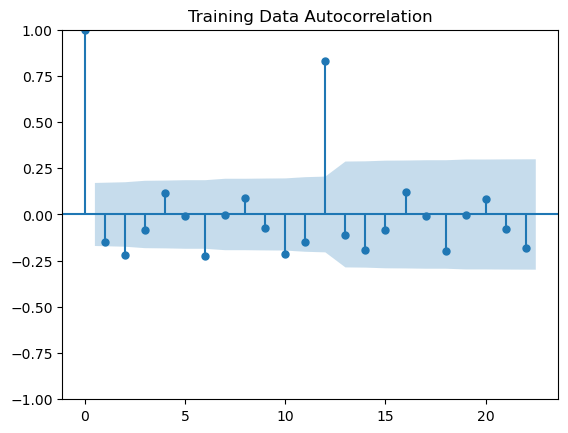

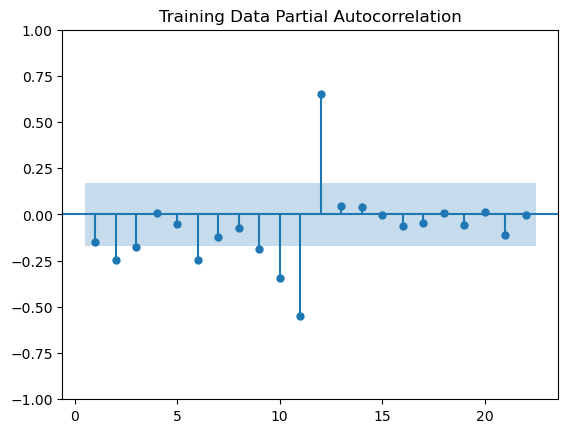

In [286]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [287]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Wed, 28 Dec 2022   AIC                           2267.663
Time:                        19:10:55   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

### Predict on the Test Set using this model and evaluate the model.

In [288]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [289]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

3864.2793518443914


In [290]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,resultsDf_9])

resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


## Model 10: SARIMA model as per ACF and the PACF cut-off.

Let us look at the ACF and the PACF plots once more.

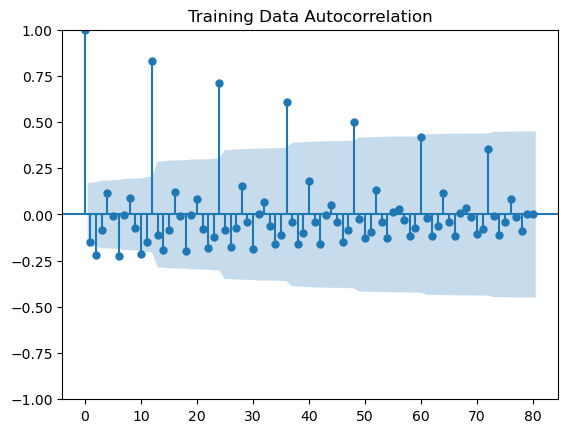

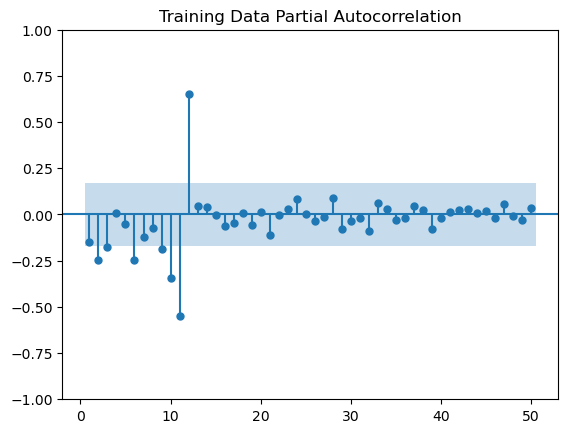

In [291]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop', lags=80)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle', lags=50);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We are taking the p value to be 0 and the q value also to be 0 as the parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.

The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 4.

In [292]:
import statsmodels.api as sm

manual_SARIMA_10 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_10 = manual_SARIMA_10.fit(maxiter=1000)
print(results_manual_SARIMA_10.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2, 3, 4], 12)   Log Likelihood                -540.038
Date:                                       Wed, 28 Dec 2022   AIC                           1090.076
Time:                                               19:10:58   BIC                           1101.319
Sample:                                                    0   HQIC                          1094.542
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.4508     

### Predict on the Test Set using this model and evaluate the model

In [293]:
predicted_manual_SARIMA_10 = results_manual_SARIMA_10.get_forecast(steps=len(test))

In [294]:
predicted_manual_SARIMA_10.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1457.309895,540.491101,397.966802,2516.652987
1,1137.104669,763.100057,-358.543959,2632.753297
2,1621.987570,934.083916,-208.783265,3452.758404
3,1337.133393,1078.287452,-776.271177,3450.537964
4,1375.211644,1205.360898,-987.252305,3737.675593


In [295]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_10.predicted_mean,squared=False)
print(rmse)

624.5113374922643


In [296]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(0,1,4,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


# Q8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

We have already build the data frame along with the paramteres used in model building and respective Test RMSE value.

In [297]:
resultsDf

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha =0.688, Beta=9.999, DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing",378.951023
NaiveModel,3864.279352
RegressionOnTime,1389.135175
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


# Q9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

We have built multiple models and based on the minimum RMSE values these are the best models.

First: Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing

Second: SARIMA(1,1,2)(1,0,2,12) 

So will build these 2 models on the Full data .

## SARIMA(1,1,2)(1,0,2,12) Model

In [298]:
full_data_model = sm.tsa.statespace.SARIMAX(df1['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Wed, 28 Dec 2022   AIC                           2360.827
Time:                                    19:11:11   BIC                           2382.309
Sample:                                01-01-1980   HQIC                          2369.551
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.242     -2.733      0.006      -1.135      -0.187
ma.L1         -0.2739      0.200   

In [299]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [300]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.358925,379.711435,1092.138187,2580.579663
1995-09-01,2489.607781,384.474678,1736.051258,3243.164303
1995-10-01,3324.589777,384.580437,2570.825972,4078.353583
1995-11-01,4020.231720,386.338203,3263.022756,4777.440683
1995-12-01,6290.002543,386.392767,5532.686636,7047.318449
1996-01-01,1244.698734,387.302892,485.599014,2003.798455
1996-02-01,1533.143141,387.531253,773.595842,2292.690440
1996-03-01,1821.710238,388.158130,1060.934283,2582.486192
1996-04-01,1788.499051,388.498154,1027.056661,2549.941441
1996-05-01,1627.572403,389.017140,865.112819,2390.031986


In [301]:
rmse = mean_squared_error(df1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9824921681942


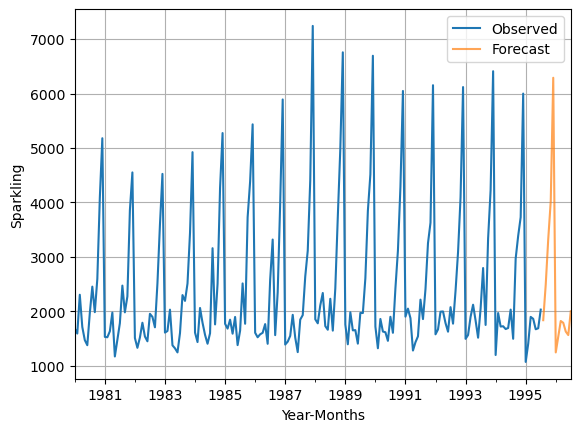

In [302]:
axis = df1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

## Alpha=0.111,Beta=0.012,Gamma=0.460,TripleExponentialSmoothing Model

In [303]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.012,
                                                                 smoothing_seasonal=0.460)

In [304]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 368.1199705679527


In [305]:
# Getting the predictions for the next 12 months 
prediction_2 = fullmodel1.forecast(steps=12)

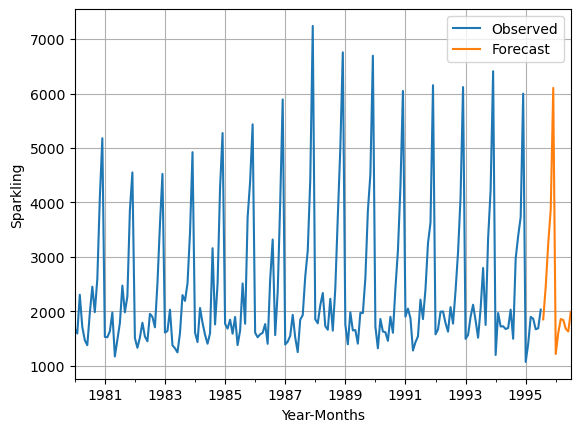

In [306]:
axis = df1['Sparkling'].plot(label='Observed')
prediction_2.plot(ax=axis, label='Forecast')

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [307]:
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1127.564038,1851.014405,2574.464772
1995-09-01,1731.765860,2455.216227,3178.666594
1995-10-01,2522.446436,3245.896803,3969.347170
1995-11-01,3150.038433,3873.488800,4596.939167
1995-12-01,5379.092987,6102.543354,6825.993721


So we can see that TripleExponentialSmoothing Model perform very well on the data as it has gives low RMSE.

# Q10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

We have built total 11 models and stored Test RMSE values in the data frame - resultsDf.

After checking All RMSE values we can say that TripleExponentialSmoothing gives the lowest RMSE Value.

As per the final plot on complete data we can say that our model is able to forecast very well. 

We have seen that past data has more influence in the forecast so more the past data better the forecast.

we have seen that sales of wine goes up at the end of the year possibly due to festival seasons so for the other months where sales are low company can provide different offers.

From our Full data Model we can see that sales for the end of year 1995 is higher compare to the other months and same we obtained in our original data.

Other model such as Automated SARIMA model also doing good because it crosschecked different combination of parameteres and with lowest AIC value we build the model, as AIC take care of complexity of model and RMSE take care of Accuracy.

Based on the SARIMA model which built on Full data we got Jarque-Bera test's P-value which is 0 so we reject the H0 & we found that Data is not normal .

Based on the Ljung-Box test's P-value we failed to reject the H0 so we can say that residuals are independent.

With the help of next 12 months forecast sales company should make some plan to do more sales in those months where sales are low comprare to end of the year they should focus more on the months before september.

#### THE END